# Kết nối Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Import thư viện

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
import math
import os
import time

<ipython-input-2-d4bb29bb2738>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [ ]:
import pandas as pd

%matplotlib inline

# String data

## Encoding

In [ ]:
string = 'abadabaaaeacadbbd'

In [ ]:
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)

In [ ]:
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d

In [ ]:
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print(freq)

[('a', 8), ('b', 4), ('d', 3), ('e', 1), ('c', 1)]


In [ ]:
nodes = freq

In [ ]:
print(nodes)

[('a', 8), ('b', 4), ('d', 3), ('e', 1), ('c', 1)]


In [ ]:
while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))

    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

#print(nodes[0][0])

print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 'a'  |           0
 'b'  |          10
 'd'  |         111
 'e'  |        1101
 'c'  |        1100


# Text data

## Based on character

In [ ]:
%cd /gdrive/My Drive/Colab Notebooks/

/gdrive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv("corpus.txt")

In [ ]:
f = open("corpus.txt",'r',encoding = 'utf-8')
story = f.read()
print(story)

My name is Nguyen Thu Hoai. I am 22 years old and I am single. I live in Ho Chi Minh city and have just graduated from X university in August with the major in Accounting. I have got 3 months experience as an intern at A company. I like reading books and cooking. I am a careful and hard-working person. I am eager to learn new things and willing to work in team. I easily adapt to new working environment and take initiative in work.


In [ ]:
c_freq = {}
for c in story:
    if c in c_freq:
        c_freq[c] += 1
    else:
        c_freq[c] = 1

c_freq = sorted(c_freq.items(), key=lambda x: x[1], reverse=True)


In [ ]:
story = story.lower()
print(story)

my name is nguyen thu hoai. i am 22 years old and i am single. i live in ho chi minh city and have just graduated from x university in august with the major in accounting. i have got 3 months experience as an intern at a company. i like reading books and cooking. i am a careful and hard-working person. i am eager to learn new things and willing to work in team. i easily adapt to new working environment and take initiative in work.


In [ ]:
c_nodes = c_freq

In [ ]:
print(c_nodes)

[(' ', 85), ('n', 38), ('a', 34), ('i', 32), ('e', 30), ('o', 22), ('t', 22), ('r', 18), ('g', 13), ('s', 12), ('d', 12), ('m', 11), ('h', 10), ('u', 9), ('l', 9), ('.', 8), ('I', 8), ('w', 8), ('k', 8), ('y', 7), ('c', 7), ('v', 6), ('p', 4), ('A', 3), ('M', 2), ('H', 2), ('2', 2), ('j', 2), ('f', 2), ('N', 1), ('T', 1), ('C', 1), ('X', 1), ('3', 1), ('x', 1), ('b', 1), ('-', 1)]


In [ ]:
while len(c_nodes) > 1:
    (key1, c1) = c_nodes[-1]
    (key2, c2) = c_nodes[-2]
    c_nodes = c_nodes[:-2]
    node = NodeTree(key1, key2)
    c_nodes.append((node, c1 + c2))

    c_nodes = sorted(c_nodes, key=lambda x: x[1], reverse=True)


huffmanCode = huffman_code_tree(c_nodes[0][0])

In [ ]:
print(c_nodes[0][0])

 _h_m_t_o_d_s_v_c_g_e_y_x_3_-_b_T_N_X_C_w_I_i_2_H_f_j_k_._p_M_A_a_l_u_r_n


In [ ]:
print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in c_freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 ' '  |          00
 'n'  |        1111
 'a'  |        1101
 'i'  |        1011
 'e'  |        1001
 'o'  |        0110
 't'  |        0101
 'r'  |       11101
 'g'  |       10001
 's'  |       01111
 'd'  |       01110
 'm'  |       01001
 'h'  |       01000
 'u'  |      111001
 'l'  |      111000
 '.'  |      110010
 'I'  |      101011
 'w'  |      101010
 'k'  |      110001
 'y'  |      101000
 'c'  |      100001
 'v'  |      100000
 'p'  |     1100110
 'A'  |    11001111
 'M'  |    11001110
 'H'  |    11000001
 '2'  |    11000000
 'j'  |    11000011
 'f'  |    11000010
 'N'  |   101001101
 'T'  |   101001100
 'C'  |   101001111
 'X'  |   101001110
 '3'  |   101001001
 'x'  |   101001000
 'b'  |   101001011
 '-'  |   101001010


# Image data

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!wget https://www.elle.vn/wp-content/uploads/2017/07/25/hinh-anh-dep-1.jpg

--2023-03-27 06:40:57--  https://www.elle.vn/wp-content/uploads/2017/07/25/hinh-anh-dep-1.jpg
Resolving www.elle.vn (www.elle.vn)... 45.117.163.171
Connecting to www.elle.vn (www.elle.vn)|45.117.163.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166963 (163K) [image/jpeg]
Saving to: ‘hinh-anh-dep-1.jpg’

hinh-anh-dep-1.jpg  100%[===================>] 163.05K   440KB/s    in 0.4s    

2023-03-27 06:40:59 (440 KB/s) - ‘hinh-anh-dep-1.jpg’ saved [166963/166963]



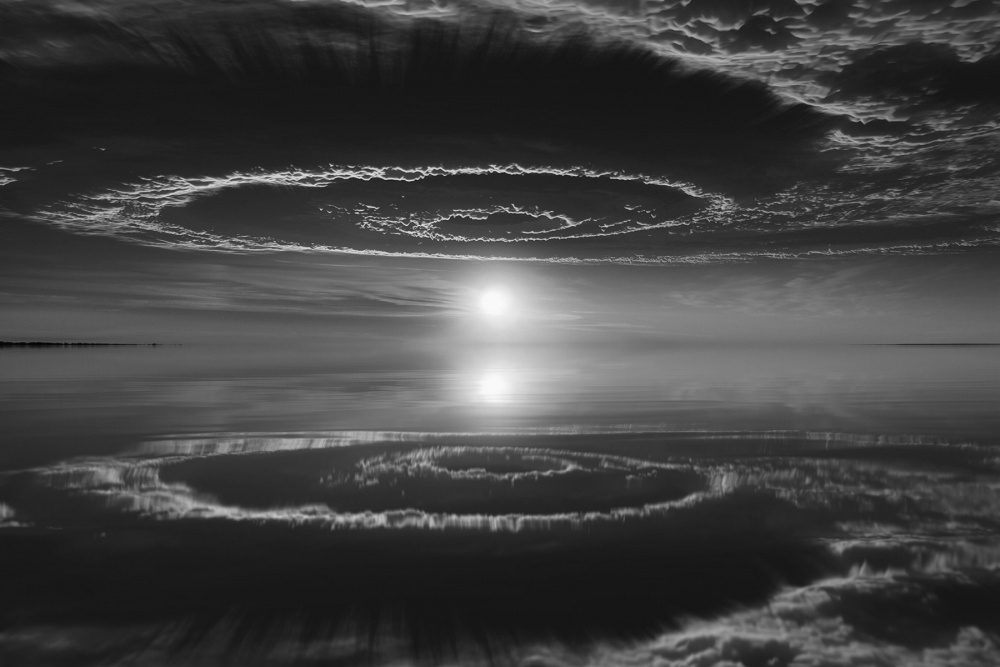

In [ ]:
img= cv2.imread("hinh-anh-dep-1.jpg", cv2.IMREAD_GRAYSCALE )
cv2_imshow(img)

In [ ]:
fimg= img.flatten()
fimg

array([63, 63, 63, ..., 73, 75, 76], dtype=uint8)

In [ ]:
def decode_file_img (root, s):
    ans =[]
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right

        # reached leaf node
        if curr.left is None and curr.right is None:
            ans.append(curr.data)
            curr = root
    return ans

In [ ]:

codes = {}
freq = defaultdict(int)
# Driver code
if __name__ == "__main__":
    minHeap = []
    #str = tmp   # chạy trên chuỗi char
    str= fimg  # chạy trên tập dữ liệu text
    print(str)
    encodedString, decodedString = "", ""

    calcFreq(str, len(str))


    HuffmanCodes(len(str))

    sum_bit=0
    print("Character With there Frequencies:")
    print(freq)
    for key in sorted(codes):
        print(key, codes[key])
        sum_bit += freq[key] * len(codes[key])

    for i in str:
        encodedString += codes[i]

    '''print("Ti le nen: ", sum_bit / (len(str)*5))

    print("\nEncoded Huffman data:")
    print(encodedString)
    '''

    # Function call
    decodedString = decode_file_img(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

    decoded = np.array(decodedString, dtype=np.uint8)
    decoded = decoded.reshape(img.shape)
    cv2_imshow(decoded)


In [ ]:
cv2.imwrite("hinhanhxauhoac.jpg", decoded)


True

In [ ]:
import os
print(os.path.getsize("/content/hinh-anh-dep-1.jpg")/ os.path.getsize("/content/hinhanhxauhoac.jpg"))



1.2393794306498904


In [ ]:
encodedString

'010100001010000101000011100001001010101000010001000100100100010010001000100100100010010001001000010001010000001100010001111101011111001111110011111110000011000010010010010001111010111100101101011010001101000110100011010001101010110100011001101101010110100011001101101000101101011001101011010110011011001101100110110011010110101000110011110001110000111000011100001001000100100010010001010000101000010100001001010100010001001001000010010000000101100010100001010000101100010110001011001101001000100100101010010101001000111101100110111010101111000111100100000000101011111110010100000001110110000000000000111100111110111110001110100010110101011010101101011001101100110110011011001101101000110100011001101011010100110110001100111011010100001000100100001010000101000010011010000101100010100001010001000000100100100101010100001010000100101010001001001010100010010001001000100100101010100001010000101000010100001001000111000010010001010000100101010010101010000100100010100001001010100101010100001010000101000

In [ ]:
freq = set(fimg)

In [ ]:
len(freq)

248

In [ ]:
import math

print(len(encodedString) / (round(math.log2(len(freq)), 0) * len(fimg)))

0.860224700149925


In [ ]:
round(math.log2(len(freq)), 0)

8.0